In [6]:
import numpy as np 
import pandas as pd 
from textblob import TextBlob as tb
import plotly.graph_objects as go 
import plotly.express as xp 

In [3]:
modi = pd.read_csv("modi_reviews.csv")
rahul = pd.read_csv("rahul_reviews.csv")

In [4]:
modi.head()

,Unnamed: 0,User,Tweet
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,TheNirbhay1,PM Modi creates a new record of being the only...
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...


In [5]:
rahul.head()

,Unnamed: 0,User,Tweet
0,0,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,1,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,3,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,4,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...


In [7]:
tb(modi["Tweet"][0]).sentiment

Sentiment(polarity=0.35, subjectivity=0.36250000000000004)

In [8]:
tb(rahul["Tweet"][0]).sentiment

Sentiment(polarity=0.21875, subjectivity=0.4017857142857143)

In [9]:
modi["Tweet"] = modi["Tweet"].astype(str) 
rahul["Tweet"] = modi["Tweet"].astype(str) 

def find_polarity(review): 
    return tb(review).sentiment.polarity

In [10]:
modi["Polarity"] = modi["Tweet"].apply(find_polarity)
rahul["Polarity"] = rahul["Tweet"].apply(find_polarity)

In [11]:
modi.head()

,Unnamed: 0,User,Tweet,Polarity
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788


In [12]:
modi["Label"] = np.where(modi["Polarity"]>0,"Positive","Negative")
modi["Label"][modi["Polarity"]==0]= "Neutral"

rahul["Label"] = np.where(rahul["Polarity"]>0,"Positive","Negative")
rahul["Label"][rahul["Polarity"]==0]= "Neutral"

C:\Users\Hp\AppData\Local\Temp\ipykernel_10184\2418337359.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hp\AppData\Local\Temp\ipykernel_10184\2418337359.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
rahul.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,Sunnysweet16,@anjanaomkashyap I am seeing you as future #bj...,0.350000,Positive
1,1,drnitinchaube,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
2,2,mrvivek07,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
3,3,JosephPravinP,PM Modi creates a new record of being the only...,0.312121,Positive
4,4,VandanaMegastar,@abhijitmajumder Appointment of Successor! \n\...,0.098788,Positive


In [14]:
modi.head()

,Unnamed: 0,User,Tweet,Polarity,Label
0,0,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,0.350000,Positive
1,1,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
2,2,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,0.800000,Positive
3,3,TheNirbhay1,PM Modi creates a new record of being the only...,0.312121,Positive
4,4,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,0.098788,Positive


In [15]:
neutral_modi = modi[modi['Polarity']==0.0000]

remove_neutral_modi = modi['Polarity'].isin(neutral_modi['Polarity'])
modi.drop(modi[remove_neutral_modi].index,inplace=True)
print(neutral_modi.shape)
print(modi.shape)

(8207, 5)
(17481, 5)


In [16]:
print(modi.shape)
print(rahul.shape)

(17481, 5)
(14261, 5)


In [17]:
#modi
np.random.seed(10)
remove_n = 8481
drop_indices = np.random.choice(modi.index,remove_n,replace=False)
df_modi = modi.drop(drop_indices)

In [18]:
#modi
np.random.seed(10)
remove_n = 367
drop_indices1 = np.random.choice(rahul.index,remove_n,replace=False)
df_rahul = rahul.drop(drop_indices1)

In [19]:
print(df_modi.shape)
print(df_rahul.shape)

(9000, 5)
(13894, 5)


In [21]:
modi_count = df_modi.groupby('Label').count()
neg_modi = (modi_count['Polarity'][0] / 1000) * 100
pos_modi = (modi_count['Polarity'][1] / 1000) * 100

In [22]:
rahul_count = df_rahul.groupby('Label').count()
neg_rahul = (rahul_count['Polarity'][0] / 1000) * 100
pos_rahul = (rahul_count['Polarity'][1] / 1000) * 10

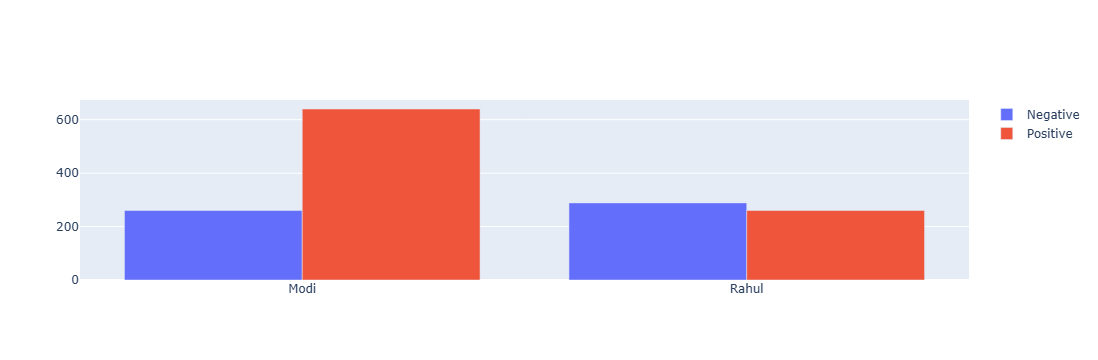

In [23]:
politicians = ['Modi','Rahul']

neg_list = [neg_modi,neg_rahul]
pos_list = [pos_modi,neg_modi]


fig = go.Figure(
data = [
    go.Bar(name='Negative',x=politicians,y=neg_list),
    go.Bar(name='Positive',x=politicians,y=pos_list)
]
)
fig.update_layout(barmode='group')
fig.show()

In [24]:
modi_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
Negative,2600,2600,2600,2600
Positive,6400,6400,6400,6400


In [25]:
rahul_count

,Unnamed: 0,User,Tweet,Polarity
Label,,,,
Negative,2886,2886,2886,2886
Neutral,4330,4330,4330,4330
Positive,6678,6678,6678,6678
